In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [5]:
data_imgs = np.load('../Kanji-recognizer/data/kkanj-imgs.npz')
data_labels = np.load('../Kanji-recognizer/data/kkanji-labels.npz')

imgs = data_imgs['arr_0']
labels = data_labels['arr_0']

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


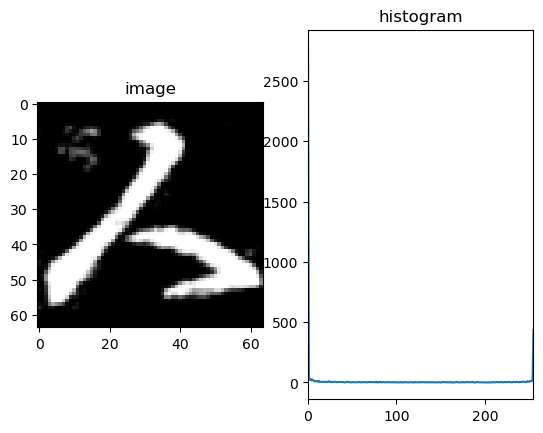

In [6]:
img = imgs[15104]
img = np.asarray(img)
print(img)
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('image')

plt.subplot(1,2,2)
hist,bin = np.histogram(img.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist)
plt.title('histogram')

plt.show()


<Figure size 640x480 with 0 Axes>

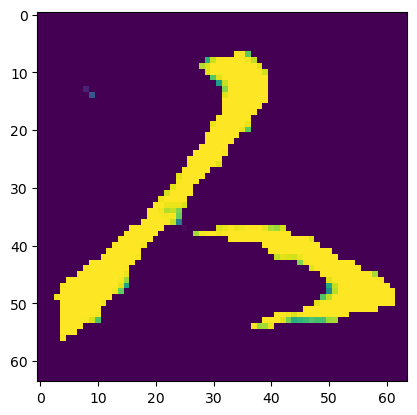

<Figure size 640x480 with 0 Axes>

In [8]:
(contours, hierarchy) = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
im1 = img.copy()
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(0,0,0),thickness=2)
plt.imshow(im1)
plt.figure()

There are 2 cards


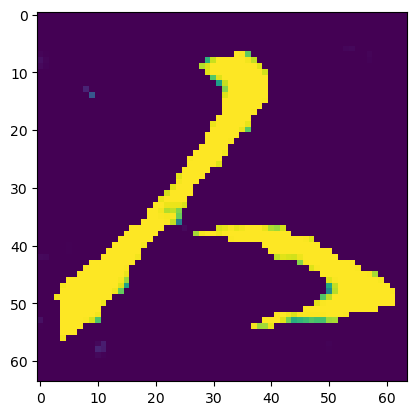

In [9]:
im2 = img.copy()
main_contours = []
count = 0
for c in contours:
    if cv2.contourArea(c) > 50:
        count+=1
        cv2.drawContours(im2, [c], -1, (0, 255, 0), 2)
        main_contours.append(c)

plt.imshow(im2, interpolation='none')
print(f'There are {count} cards')